Total Trades: 131
Total Profit/Loss: ₹24,001,349.29
Sharpe Ratio: 5.39
Calmar Ratio: 11.33
Max Drawdown: ₹2,117,565.53


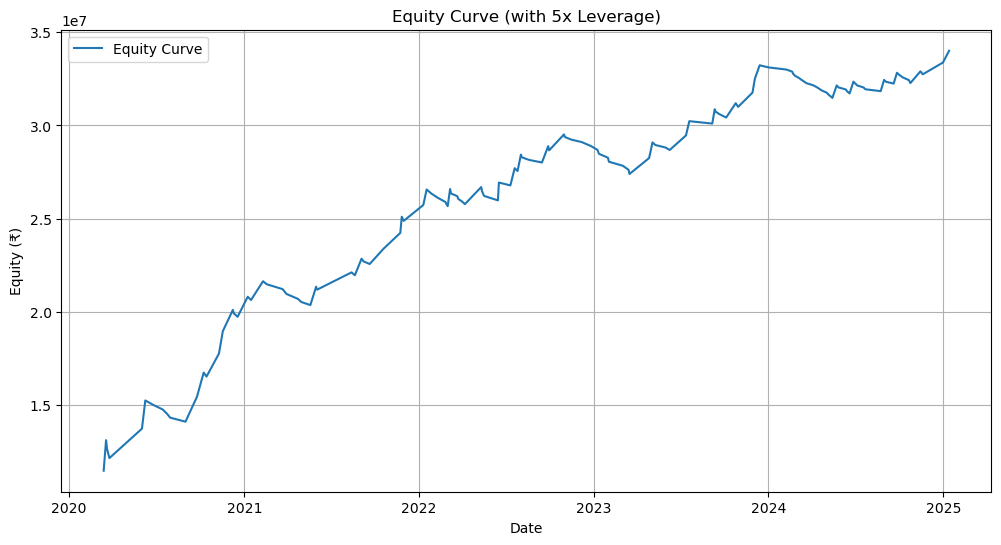

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import MACD, SMAIndicator

# Load your NIFTY 50 daily data with lowercase columns
df = pd.read_csv('NF_daily.csv')  # Assume it contains 'open', 'high', 'low', 'close', 'volume', 'date'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Parameters
initial_capital = 1_00_00_000  # ₹1 Crore
leverage = 5
capital = initial_capital * leverage
profit_target = 300
stop_loss_long = 50
stop_loss_short = 75
ma_length = 50

# === Indicators ===
rsi = RSIIndicator(close=df['close'], window=14).rsi()
macd = MACD(close=df['close'], window_slow=26, window_fast=12, window_sign=9)
ma = SMAIndicator(close=df['close'], window=ma_length).sma_indicator()

# Add to DataFrame
df['rsi'] = rsi
df['macd_hist'] = macd.macd_diff()
df['macd_increasing'] = df['macd_hist'].diff() > 0
df['macd_decreasing'] = df['macd_hist'].diff() < 0
df['ma'] = ma

# === Signal Conditions ===
df['long_signal'] = (df['rsi'] > 55) & (df['macd_hist'] > 0) & df['macd_increasing'] & (df['close'] > df['ma'])
df['short_signal'] = (df['rsi'] < 45) & (df['macd_hist'] < 0) & df['macd_decreasing'] & (df['close'] < df['ma'])

# === Trade Execution ===
trades = []
position = None

for i in range(1, len(df)):
    if position is None:
        if df['long_signal'].iloc[i - 1]:
            entry_high = df['high'].iloc[i - 1]
            if df['open'].iloc[i] > entry_high:
                entry_price = df['open'].iloc[i]
            elif df['high'].iloc[i] > entry_high:
                entry_price = entry_high
            else:
                continue
            position = {
                'type': 'long',
                'entry_price': entry_price,
                'entry_date': df.index[i]
            }

        elif df['short_signal'].iloc[i - 1]:
            entry_low = df['low'].iloc[i - 1]
            if df['open'].iloc[i] < entry_low:
                entry_price = df['open'].iloc[i]
            elif df['low'].iloc[i] < entry_low:
                entry_price = entry_low
            else:
                continue
            position = {
                'type': 'short',
                'entry_price': entry_price,
                'entry_date': df.index[i]
            }

    else:
        if position['type'] == 'long':
            high = df['high'].iloc[i]
            low = df['low'].iloc[i]
            if high - position['entry_price'] >= profit_target:
                exit_price = position['entry_price'] + profit_target
                trades.append({**position, 'exit_price': exit_price, 'exit_date': df.index[i], 'pnl': profit_target})
                position = None
            elif position['entry_price'] - low >= stop_loss_long:
                exit_price = position['entry_price'] - stop_loss_long
                trades.append({**position, 'exit_price': exit_price, 'exit_date': df.index[i], 'pnl': -stop_loss_long})
                position = None

        elif position['type'] == 'short':
            high = df['high'].iloc[i]
            low = df['low'].iloc[i]
            if position['entry_price'] - low >= profit_target:
                exit_price = position['entry_price'] - profit_target
                trades.append({**position, 'exit_price': exit_price, 'exit_date': df.index[i], 'pnl': profit_target})
                position = None
            elif high - position['entry_price'] >= stop_loss_short:
                exit_price = position['entry_price'] + stop_loss_short
                trades.append({**position, 'exit_price': exit_price, 'exit_date': df.index[i], 'pnl': -stop_loss_short})
                position = None

# === Trade Analysis ===
trades_df = pd.DataFrame(trades)
trades_df['capital_used'] = capital
trades_df['return_pct'] = trades_df['pnl'] / trades_df['entry_price']
trades_df['returns'] = trades_df['return_pct'] * trades_df['capital_used']

# === Equity Curve ===
trades_df['equity'] = initial_capital + trades_df['returns'].cumsum()
trades_df.set_index('exit_date', inplace=True)

# === Performance Metrics ===
daily_returns = trades_df['returns'] / initial_capital
sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252)
max_drawdown = (trades_df['equity'].cummax() - trades_df['equity']).max()
calmar_ratio = (trades_df['equity'].iloc[-1] - initial_capital) / max_drawdown if max_drawdown != 0 else np.nan

# === Print Results ===
print(f"Total Trades: {len(trades_df)}")
print(f"Total Profit/Loss: ₹{trades_df['returns'].sum():,.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Max Drawdown: ₹{max_drawdown:,.2f}")

# === Plot Equity Curve ===
plt.figure(figsize=(12, 6))
plt.plot(trades_df['equity'], label='Equity Curve')
plt.title("Equity Curve (with 5x Leverage)")
plt.xlabel("Date")
plt.ylabel("Equity (₹)")
plt.grid(True)
plt.legend()
plt.show()


Total Trades: 153
Total Profit/Loss: ₹22,738,911.42
Sharpe Ratio: 8.70
Calmar Ratio: 16.50
Max Drawdown: ₹1,377,991.99


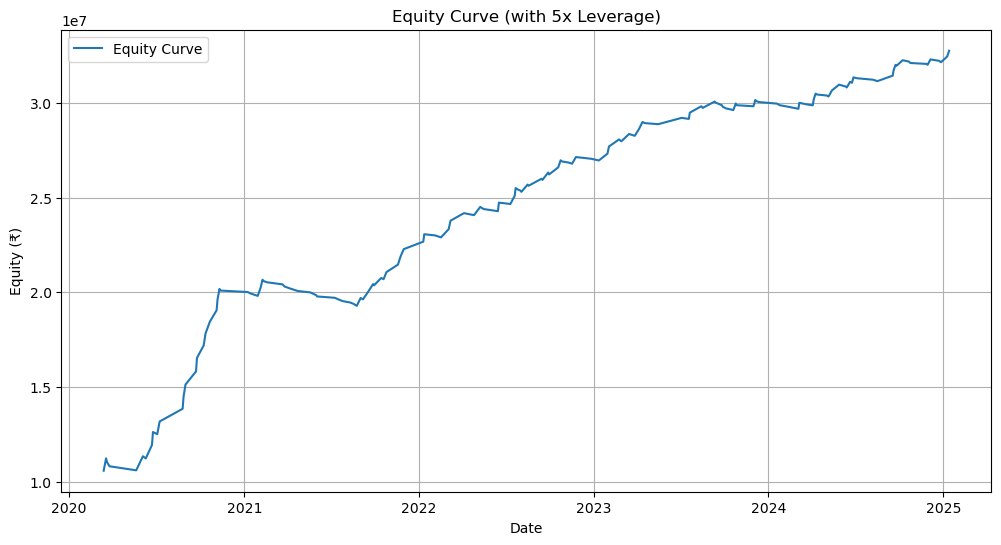

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import MACD, SMAIndicator

# Load your NIFTY 50 daily data with lowercase columns
df = pd.read_csv('NB_daily.csv')  # Assume it contains 'open', 'high', 'low', 'close', 'volume', 'date'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Parameters
initial_capital = 1_00_00_000  # ₹1 Crore
leverage = 5
capital = initial_capital * leverage
profit_target = 300
stop_loss_long = 50
stop_loss_short = 75
ma_length = 50

# === Indicators ===
rsi = RSIIndicator(close=df['close'], window=14).rsi()
macd = MACD(close=df['close'], window_slow=26, window_fast=12, window_sign=9)
ma = SMAIndicator(close=df['close'], window=ma_length).sma_indicator()

# Add to DataFrame
df['rsi'] = rsi
df['macd_hist'] = macd.macd_diff()
df['macd_increasing'] = df['macd_hist'].diff() > 0
df['macd_decreasing'] = df['macd_hist'].diff() < 0
df['ma'] = ma

# === Signal Conditions ===
df['long_signal'] = (df['rsi'] > 55) & (df['macd_hist'] > 0) & df['macd_increasing'] & (df['close'] > df['ma'])
df['short_signal'] = (df['rsi'] < 45) & (df['macd_hist'] < 0) & df['macd_decreasing'] & (df['close'] < df['ma'])

# === Trade Execution ===
trades = []
position = None

for i in range(1, len(df)):
    if position is None:
        if df['long_signal'].iloc[i - 1]:
            entry_high = df['high'].iloc[i - 1]
            if df['open'].iloc[i] > entry_high:
                entry_price = df['open'].iloc[i]
            elif df['high'].iloc[i] > entry_high:
                entry_price = entry_high
            else:
                continue
            position = {
                'type': 'long',
                'entry_price': entry_price,
                'entry_date': df.index[i]
            }

        elif df['short_signal'].iloc[i - 1]:
            entry_low = df['low'].iloc[i - 1]
            if df['open'].iloc[i] < entry_low:
                entry_price = df['open'].iloc[i]
            elif df['low'].iloc[i] < entry_low:
                entry_price = entry_low
            else:
                continue
            position = {
                'type': 'short',
                'entry_price': entry_price,
                'entry_date': df.index[i]
            }

    else:
        if position['type'] == 'long':
            high = df['high'].iloc[i]
            low = df['low'].iloc[i]
            if high - position['entry_price'] >= profit_target:
                exit_price = position['entry_price'] + profit_target
                trades.append({**position, 'exit_price': exit_price, 'exit_date': df.index[i], 'pnl': profit_target})
                position = None
            elif position['entry_price'] - low >= stop_loss_long:
                exit_price = position['entry_price'] - stop_loss_long
                trades.append({**position, 'exit_price': exit_price, 'exit_date': df.index[i], 'pnl': -stop_loss_long})
                position = None

        elif position['type'] == 'short':
            high = df['high'].iloc[i]
            low = df['low'].iloc[i]
            if position['entry_price'] - low >= profit_target:
                exit_price = position['entry_price'] - profit_target
                trades.append({**position, 'exit_price': exit_price, 'exit_date': df.index[i], 'pnl': profit_target})
                position = None
            elif high - position['entry_price'] >= stop_loss_short:
                exit_price = position['entry_price'] + stop_loss_short
                trades.append({**position, 'exit_price': exit_price, 'exit_date': df.index[i], 'pnl': -stop_loss_short})
                position = None

# === Trade Analysis ===
trades_df = pd.DataFrame(trades)
trades_df['capital_used'] = capital
trades_df['return_pct'] = trades_df['pnl'] / trades_df['entry_price']
trades_df['returns'] = trades_df['return_pct'] * trades_df['capital_used']

# === Equity Curve ===
trades_df['equity'] = initial_capital + trades_df['returns'].cumsum()
trades_df.set_index('exit_date', inplace=True)

# === Performance Metrics ===
daily_returns = trades_df['returns'] / initial_capital
sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252)
max_drawdown = (trades_df['equity'].cummax() - trades_df['equity']).max()
calmar_ratio = (trades_df['equity'].iloc[-1] - initial_capital) / max_drawdown if max_drawdown != 0 else np.nan

# === Print Results ===
print(f"Total Trades: {len(trades_df)}")
print(f"Total Profit/Loss: ₹{trades_df['returns'].sum():,.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Max Drawdown: ₹{max_drawdown:,.2f}")

# === Plot Equity Curve ===
plt.figure(figsize=(12, 6))
plt.plot(trades_df['equity'], label='Equity Curve')
plt.title("Equity Curve (with 5x Leverage)")
plt.xlabel("Date")
plt.ylabel("Equity (₹)")
plt.grid(True)
plt.legend()
plt.show()

Total Trades: 131
Total Profit/Loss: ₹23,344,310.26
Sharpe Ratio: 5.24
Calmar Ratio: 10.74
Max Drawdown: ₹2,172,825.79


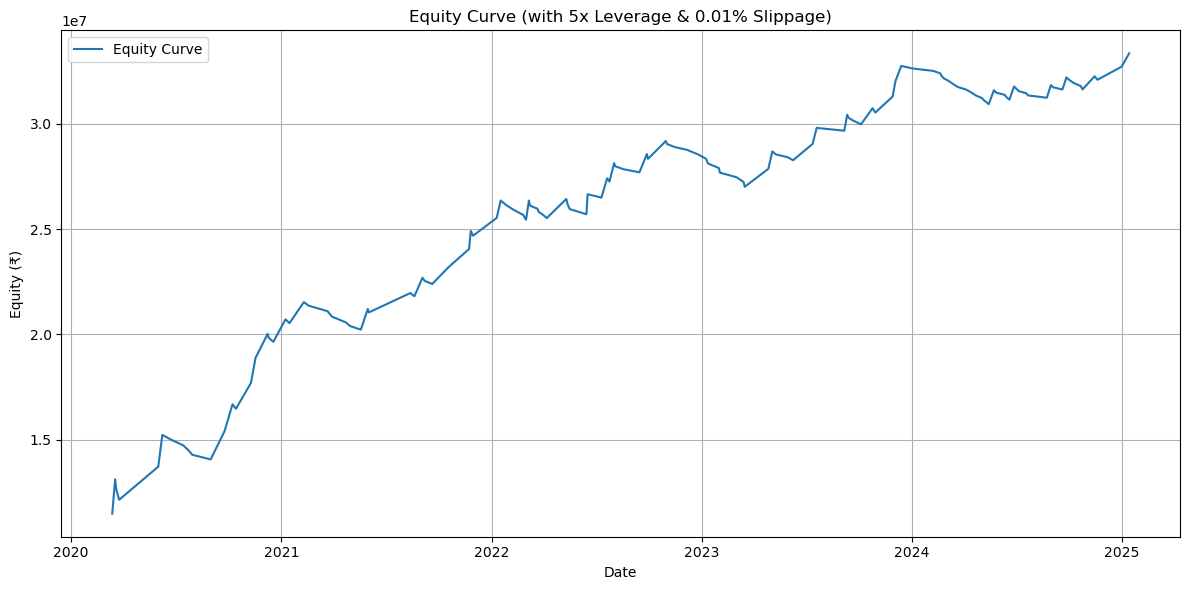

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import MACD, SMAIndicator

# === Load Data ===
df = pd.read_csv('NF_daily.csv')  # Columns: 'date', 'open', 'high', 'low', 'close', 'volume'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# === Parameters ===
initial_capital = 1_00_00_000  # ₹1 Crore
leverage = 5
capital = initial_capital * leverage
profit_target = 300
stop_loss_long = 50
stop_loss_short = 75
ma_length = 50
slippage_rate = 0.0001  # 0.01%

# === Helper: Apply Slippage ===
def apply_slippage(price, direction):
    if direction == 'buy':
        return price * (1 + slippage_rate)
    elif direction == 'sell':
        return price * (1 - slippage_rate)
    return price

# === Indicators ===
rsi = RSIIndicator(close=df['close'], window=14).rsi()
macd = MACD(close=df['close'], window_slow=26, window_fast=12, window_sign=9)
ma = SMAIndicator(close=df['close'], window=ma_length).sma_indicator()

df['rsi'] = rsi
df['macd_hist'] = macd.macd_diff()
df['macd_increasing'] = df['macd_hist'].diff() > 0
df['macd_decreasing'] = df['macd_hist'].diff() < 0
df['ma'] = ma

# === Signal Conditions ===
df['long_signal'] = (df['rsi'] > 55) & (df['macd_hist'] > 0) & df['macd_increasing'] & (df['close'] > df['ma'])
df['short_signal'] = (df['rsi'] < 45) & (df['macd_hist'] < 0) & df['macd_decreasing'] & (df['close'] < df['ma'])

# === Trade Execution ===
trades = []
position = None

for i in range(1, len(df)):
    if position is None:
        if df['long_signal'].iloc[i - 1]:
            entry_high = df['high'].iloc[i - 1]
            if df['open'].iloc[i] > entry_high:
                entry_price = apply_slippage(df['open'].iloc[i], 'buy')
            elif df['high'].iloc[i] > entry_high:
                entry_price = apply_slippage(entry_high, 'buy')
            else:
                continue
            position = {
                'type': 'long',
                'entry_price': entry_price,
                'entry_date': df.index[i]
            }

        elif df['short_signal'].iloc[i - 1]:
            entry_low = df['low'].iloc[i - 1]
            if df['open'].iloc[i] < entry_low:
                entry_price = apply_slippage(df['open'].iloc[i], 'sell')
            elif df['low'].iloc[i] < entry_low:
                entry_price = apply_slippage(entry_low, 'sell')
            else:
                continue
            position = {
                'type': 'short',
                'entry_price': entry_price,
                'entry_date': df.index[i]
            }

    else:
        high = df['high'].iloc[i]
        low = df['low'].iloc[i]
        if position['type'] == 'long':
            if high - position['entry_price'] >= profit_target:
                raw_exit = position['entry_price'] + profit_target
                exit_price = apply_slippage(raw_exit, 'sell')
                pnl = exit_price - position['entry_price']
                trades.append({**position, 'exit_price': exit_price, 'exit_date': df.index[i], 'pnl': pnl})
                position = None
            elif position['entry_price'] - low >= stop_loss_long:
                raw_exit = position['entry_price'] - stop_loss_long
                exit_price = apply_slippage(raw_exit, 'sell')
                pnl = exit_price - position['entry_price']
                trades.append({**position, 'exit_price': exit_price, 'exit_date': df.index[i], 'pnl': pnl})
                position = None

        elif position['type'] == 'short':
            if position['entry_price'] - low >= profit_target:
                raw_exit = position['entry_price'] - profit_target
                exit_price = apply_slippage(raw_exit, 'buy')
                pnl = position['entry_price'] - exit_price
                trades.append({**position, 'exit_price': exit_price, 'exit_date': df.index[i], 'pnl': pnl})
                position = None
            elif high - position['entry_price'] >= stop_loss_short:
                raw_exit = position['entry_price'] + stop_loss_short
                exit_price = apply_slippage(raw_exit, 'buy')
                pnl = position['entry_price'] - exit_price
                trades.append({**position, 'exit_price': exit_price, 'exit_date': df.index[i], 'pnl': pnl})
                position = None

# === Trade Analysis ===
trades_df = pd.DataFrame(trades)
trades_df['capital_used'] = capital
trades_df['return_pct'] = trades_df['pnl'] / trades_df['entry_price']
trades_df['returns'] = trades_df['return_pct'] * trades_df['capital_used']

# === Equity Curve ===
trades_df['equity'] = initial_capital + trades_df['returns'].cumsum()
trades_df.set_index('exit_date', inplace=True)

# === Performance Metrics ===
daily_returns = trades_df['returns'] / initial_capital
sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252) if np.std(daily_returns) != 0 else np.nan
max_drawdown = (trades_df['equity'].cummax() - trades_df['equity']).max()
calmar_ratio = (trades_df['equity'].iloc[-1] - initial_capital) / max_drawdown if max_drawdown != 0 else np.nan

# === Print Results ===
print(f"Total Trades: {len(trades_df)}")
print(f"Total Profit/Loss: ₹{trades_df['returns'].sum():,.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Max Drawdown: ₹{max_drawdown:,.2f}")

# === Plot Equity Curve ===
plt.figure(figsize=(12, 6))
plt.plot(trades_df['equity'], label='Equity Curve')
plt.title("Equity Curve (with 5x Leverage & 0.01% Slippage)")
plt.xlabel("Date")
plt.ylabel("Equity (₹)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Train Set:
  Trades: 94
  Sharpe Ratio: 6.67
  Calmar Ratio: 6.20
  Max Drawdown: ₹1,867,456

Test Set:
  Trades: 44
  Sharpe Ratio: 2.92
  Calmar Ratio: 16.31
  Max Drawdown: ₹800,691


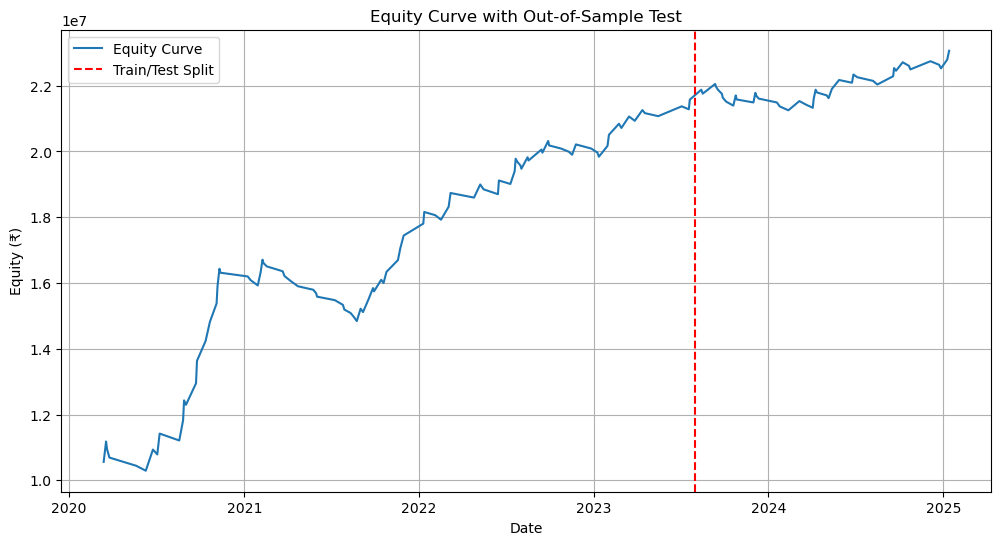

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import MACD, SMAIndicator
from sklearn.model_selection import train_test_split

# Load your NIFTY 50 daily data
df = pd.read_csv('NB_daily.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Indicators
rsi = RSIIndicator(close=df['close'], window=14).rsi()
macd = MACD(close=df['close'], window_slow=26, window_fast=12, window_sign=9)
ma = SMAIndicator(close=df['close'], window=50).sma_indicator()

# Add to df
df['rsi'] = rsi
df['macd_hist'] = macd.macd_diff()
df['macd_increasing'] = df['macd_hist'].diff() > 0
df['macd_decreasing'] = df['macd_hist'].diff() < 0
df['ma'] = ma

# Dynamic RSI thresholds (based on training set)
train_size = int(len(df) * 0.7)
rsi_train = df['rsi'].iloc[:train_size]
rsi_high_thresh = rsi_train.quantile(0.65)
rsi_low_thresh = rsi_train.quantile(0.35)

# Signal conditions
df['long_signal'] = (df['rsi'] > rsi_high_thresh) & (df['macd_hist'] > 0) & df['macd_increasing'] & (df['close'] > df['ma'])
df['short_signal'] = (df['rsi'] < rsi_low_thresh) & (df['macd_hist'] < 0) & df['macd_decreasing'] & (df['close'] < df['ma'])

# Capital and cost settings
initial_capital = 1_00_00_000  # ₹1 crore
leverage = 5
capital = initial_capital * leverage
risk_per_trade = 0.01 * capital  # 1% risk
profit_target = 300
stop_loss_long = 50
stop_loss_short = 75
slippage_pct = 0.0005  # 0.05% per leg
commission_pct = 0.0002  # 0.02% per leg

# Trade execution
trades = []
position = None

for i in range(1, len(df)):
    if position is None:
        if df['long_signal'].iloc[i - 1]:
            entry_high = df['high'].iloc[i - 1]
            if df['open'].iloc[i] > entry_high:
                entry_price = df['open'].iloc[i]
            elif df['high'].iloc[i] > entry_high:
                entry_price = entry_high
            else:
                continue
            entry_price *= (1 + slippage_pct + commission_pct)
            position = {'type': 'long', 'entry_price': entry_price, 'entry_date': df.index[i]}

        elif df['short_signal'].iloc[i - 1]:
            entry_low = df['low'].iloc[i - 1]
            if df['open'].iloc[i] < entry_low:
                entry_price = df['open'].iloc[i]
            elif df['low'].iloc[i] < entry_low:
                entry_price = entry_low
            else:
                continue
            entry_price *= (1 - slippage_pct - commission_pct)
            position = {'type': 'short', 'entry_price': entry_price, 'entry_date': df.index[i]}

    else:
        high = df['high'].iloc[i]
        low = df['low'].iloc[i]
        date = df.index[i]

        if position['type'] == 'long':
            if high - position['entry_price'] >= profit_target:
                exit_price = position['entry_price'] + profit_target
                exit_price *= (1 - slippage_pct - commission_pct)
                pnl = exit_price - position['entry_price']
                trades.append({**position, 'exit_price': exit_price, 'exit_date': date, 'pnl': pnl})
                position = None
            elif position['entry_price'] - low >= stop_loss_long:
                exit_price = position['entry_price'] - stop_loss_long
                exit_price *= (1 - slippage_pct - commission_pct)
                pnl = exit_price - position['entry_price']
                trades.append({**position, 'exit_price': exit_price, 'exit_date': date, 'pnl': pnl})
                position = None

        elif position['type'] == 'short':
            if position['entry_price'] - low >= profit_target:
                exit_price = position['entry_price'] - profit_target
                exit_price *= (1 + slippage_pct + commission_pct)
                pnl = position['entry_price'] - exit_price
                trades.append({**position, 'exit_price': exit_price, 'exit_date': date, 'pnl': pnl})
                position = None
            elif high - position['entry_price'] >= stop_loss_short:
                exit_price = position['entry_price'] + stop_loss_short
                exit_price *= (1 + slippage_pct + commission_pct)
                pnl = position['entry_price'] - exit_price
                trades.append({**position, 'exit_price': exit_price, 'exit_date': date, 'pnl': pnl})
                position = None

# Create DataFrame
trades_df = pd.DataFrame(trades)
trades_df['capital_used'] = capital
trades_df['return_pct'] = trades_df['pnl'] / trades_df['entry_price']
trades_df['returns'] = trades_df['return_pct'] * trades_df['capital_used']
trades_df['equity'] = initial_capital + trades_df['returns'].cumsum()
trades_df.set_index('exit_date', inplace=True)

# Train-test separation
train_end = df.index[train_size]
trades_train = trades_df[trades_df.index <= train_end]
trades_test = trades_df[trades_df.index > train_end]

# Metrics function
def performance_metrics(trades_subset):
    returns = trades_subset['returns'] / initial_capital
    sharpe = returns.mean() / returns.std() * np.sqrt(252) if returns.std() > 0 else np.nan
    equity_curve = trades_subset['equity']
    drawdown = (equity_curve.cummax() - equity_curve).max()
    calmar = (equity_curve.iloc[-1] - initial_capital) / drawdown if drawdown != 0 else np.nan
    return sharpe, calmar, drawdown

# Calculate metrics
sharpe_train, calmar_train, dd_train = performance_metrics(trades_train)
sharpe_test, calmar_test, dd_test = performance_metrics(trades_test)

# Print results
print("Train Set:")
print(f"  Trades: {len(trades_train)}")
print(f"  Sharpe Ratio: {sharpe_train:.2f}")
print(f"  Calmar Ratio: {calmar_train:.2f}")
print(f"  Max Drawdown: ₹{dd_train:,.0f}\n")

print("Test Set:")
print(f"  Trades: {len(trades_test)}")
print(f"  Sharpe Ratio: {sharpe_test:.2f}")
print(f"  Calmar Ratio: {calmar_test:.2f}")
print(f"  Max Drawdown: ₹{dd_test:,.0f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(trades_df['equity'], label='Equity Curve')
plt.axvline(x=train_end, color='red', linestyle='--', label='Train/Test Split')
plt.title("Equity Curve with Out-of-Sample Test")
plt.xlabel("Date")
plt.ylabel("Equity (₹)")
plt.grid(True)
plt.legend()
plt.show()
